In [32]:
from teneto import TemporalNetwork
import teneto
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
input_folder = ""
filename = ""

In [36]:
# format input data for teneto

data = json.loads(open(input_folder+"/"+filename).read())
all_persons = [x["personal"] for x in data]
all_persons = [x for y in all_persons for x in y]
all_persons = list(set(all_persons))
pers_dict = get_pers_dict(all_persons)

graph_input = []
for info in data:
    
    t = info["time"]
    pers = info["personal"]
    
    for p in pers:
        for p2 in pers:
            
            graph_input.append([pers_dict[p], pers_dict[p2], t])
            
graph_input = pd.DataFrame(graph_input)
graph_input.columns = ["i","j","t"]

In [37]:
# create network

tnet = TemporalNetwork(from_df=graph_input)

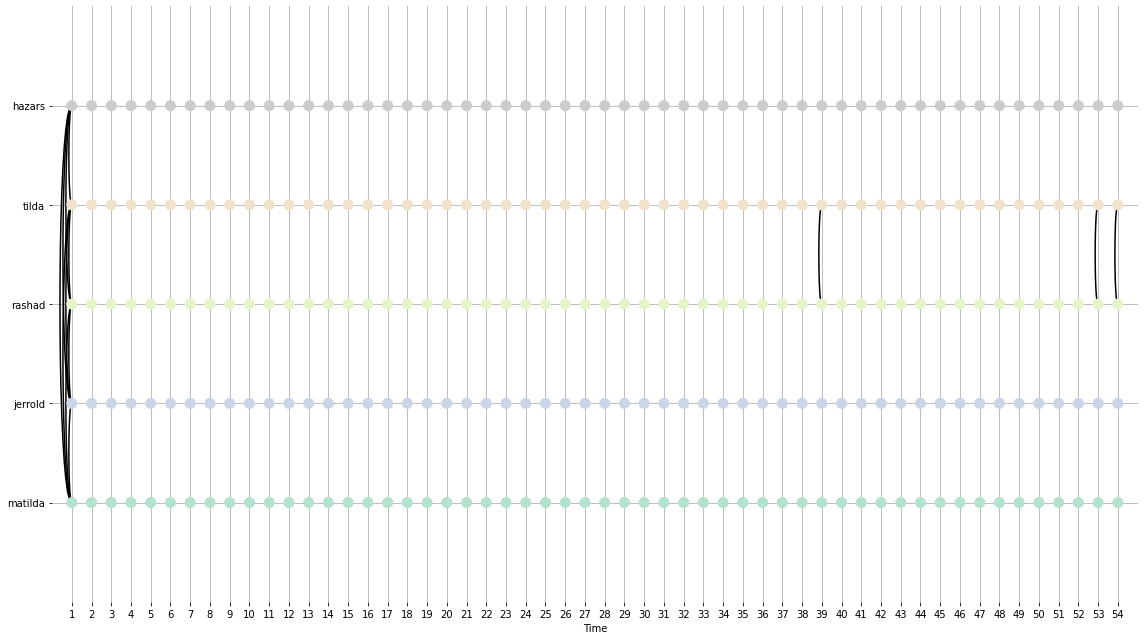

In [38]:
# create slice plot from network

fig,ax = plt.subplots(figsize=(16,9))
ax = tnet.plot("slice_plot", ax = ax, cmap='Pastel2')

ax.set_yticklabels([pers_dict[x] for x in list(range(0,len(all_persons),1))])

plt.tight_layout()
fig.show()